In [1]:
!gpustat

/usr/bin/gpustat:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
venus                       Sun Nov  3 21:36:56 2024  535.183.06
[0] NVIDIA GeForce RTX 4090 | 33'C,   0 % |   360 / 24564 MB | gdm(4M)
[1] NVIDIA GeForce RTX 4090 | 75'C,  70 % | 16156 / 24564 MB | zhangkejia(15792M) gdm(4M)
[2] NVIDIA GeForce RTX 4090 | 61'C,  95 % | 16114 / 24564 MB | zhangkejia(15750M) gdm(4M)
[3] NVIDIA GeForce RTX 4090 | 59'C,  97 % | 16156 / 24564 MB | zhangkejia(15792M) gdm(4M)
[4] NVIDIA GeForce RTX 4090 | 33'C,   0 % |  4094 / 24564 MB | zhouyufan(3730M) gdm(4M)
[5] NVIDIA GeForce RTX 4090 | 59'C,  96 % | 16114 / 24564 MB | zhangkejia(15750M) gdm(4M)
[6] NVIDIA GeForce RTX 4090 | 31'C,   0 % |   360 / 24564 MB | gdm(4M)
[7] NVIDIA GeForce RTX 4090 | 33'C,   0 % |  7056 / 24564 MB | zhouyufan(6692M) gdm(4M)


In [5]:
import torch
import clip
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
from glob import glob

# 加载CLIP模型
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def load_images_from_categories(base_folder, mix_folder=None, kind_list=None, n_images=30):
    all_image_paths = []
    categories = []
    
    # 加载原始类别图片
    category_folders = [f for f in os.listdir(base_folder) 
                       if os.path.isdir(os.path.join(base_folder, f))
                       and (kind_list is None or f in kind_list)]
    
    for category in category_folders:
        category_path = os.path.join(base_folder, category)
        image_files = glob(os.path.join(category_path, "*.jpg")) + \
                     glob(os.path.join(category_path, "*.png"))
        category_images = image_files[:n_images]
        all_image_paths.extend(category_images)
        categories.extend([category] * len(category_images))
    
    # 加载混合类别图片
    if mix_folder and os.path.exists(mix_folder):
        mix_folders = [f for f in os.listdir(mix_folder) 
                      if os.path.isdir(os.path.join(mix_folder, f))]
        
        for mix_category in mix_folders:
            mix_path = os.path.join(mix_folder, mix_category)
            mix_images = glob(os.path.join(mix_path, "*.jpg")) + \
                        glob(os.path.join(mix_path, "*.png"))
            mix_images = mix_images[:n_images]
            all_image_paths.extend(mix_images)
            categories.extend([mix_category] * len(mix_images))
    
    return all_image_paths, categories

# 加载图片
base_folder = "output/original"
mix_folder = "output/mix"
image_paths, categories = load_images_from_categories(base_folder, mix_folder=mix_folder, n_images=30)

# 提取图片特征
image_features = []
for image_path in image_paths:
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_feature = model.encode_image(image)
        image_features.append(image_feature.cpu().numpy())
image_features = np.vstack(image_features)

# t-SNE降维
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=min(len(image_features) - 1, 30),
    n_iter=1000,
    learning_rate=200,
    init='pca'
)
embeddings_2d = tsne.fit_transform(image_features)

# 获取降维后的坐标
image_points = embeddings_2d

/home/zhouyufan/anaconda3/envs/GIF/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [6]:
# 植物类
flower = ['lavender','lily','rose','sunflower']
fruit = ['lemon','fig','pineapple','soybean','tomato','cactus']
#动物类
animal = ['bird','dinosaur','frog','snake']
fish = ['fish','shark','whale']
quadruped = ['cat','cattle','dog','giraffe','hedgehog','horse','sloths','sheep','squirrel','wolf']
#交通工具类
transport = ['airplane','bicycle','car','helicopter']
#物体类
obj = ['book','chair','desk','mirror','phone','watch','wrench']
#其他类
other = ['fire','soil','steel','water','girl','human','robot','wood']
#形容词类   
adj = ['black','cloudy']




all_categories_list = [
    'airplane', 'bicycle', 'bird', 'black', 'book', 
    'cactus', 'car', 'cat', 'cattle', 'chair', 
    'cloudy', 'desk', 'dinosaur', 'dog', 'fig', 
    'fire', 'fish', 'frog', 'giraffe', 'girl', 
    'hedgehog', 'horse', 'human', 'lavender', 
    'lemon', 'lily', 'mirror', 'phone', 'pineapple', 
    'robot', 'rose', 'shark', 'sheep', 'sloths', 
    'snake', 'soil', 'soybean', 'squirrel', 'steel', 
    'sunflower', 'tomato', 'watch', 'water', 'whale',
    'wolf', 'wood', 'wrench','helicopter'
]

except_categories_list = ['cactus']

# 绘制大类

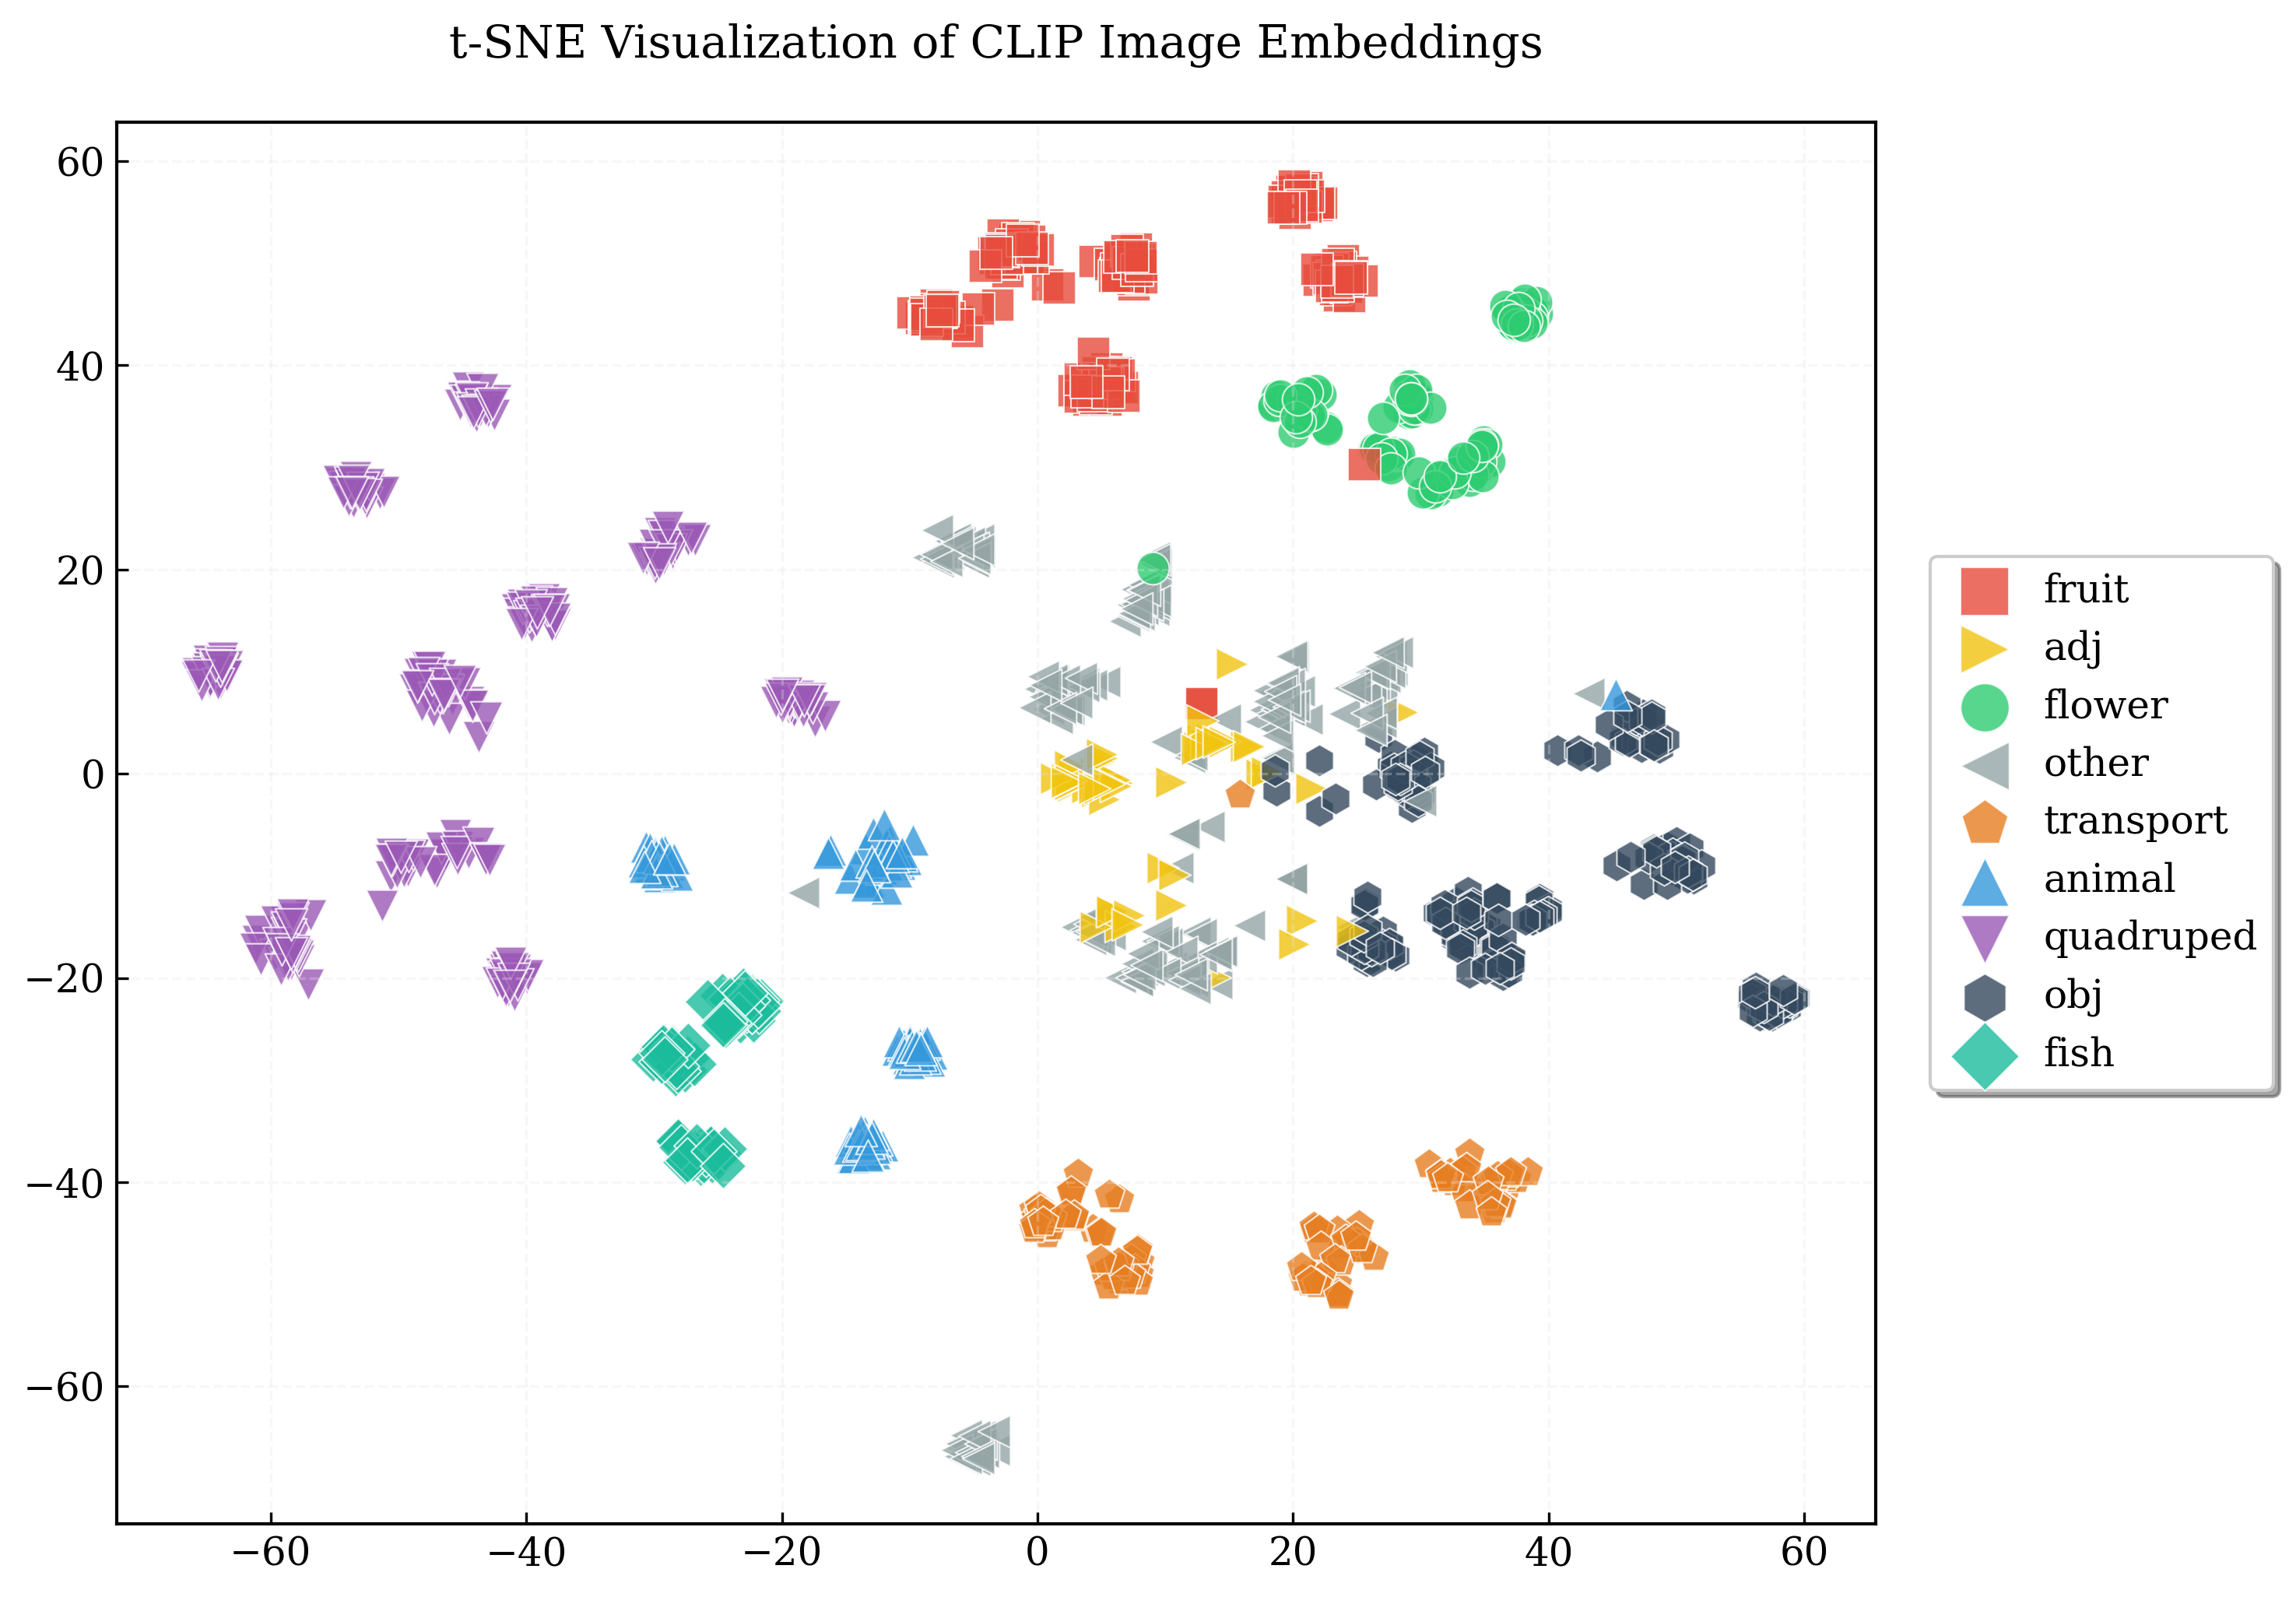

In [67]:
# 创建样式字典
style_dict = {
    'font.family': 'DejaVu Serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.linewidth': 1.0,
    'grid.color': '#E5E5E5'
}

# 使用字典设置样式
plt.style.use(style_dict)

# 创建类别组映射
category_groups = {
    'flower': flower,
    'fruit': fruit,
    'animal': animal,
    'fish': fish,
    'quadruped': quadruped,
    'other': other,
    'adj': adj,
    'transport': transport,
    'obj': obj
}

# 为每个组分配颜色和标记
group_colors = {
    'flower': '#2ecc71',     # 绿色
    'fruit': '#e74c3c',     # 红色
    'animal': '#3498db',    # 蓝色
    'fish': '#1abc9c',      # 青色
    'quadruped': '#9b59b6', # 紫色
    'other': '#95a5a6',     # 灰色
    'adj': '#f1c40f',       # 黄色
    'transport': '#e67e22', # 橙色
    'obj': '#34495e'        # 深灰色
}

group_markers = {
    'flower': 'o',      # 圆形
    'fruit': 's',      # 方形
    'animal': '^',     # 三角形
    'fish': 'D',       # 菱形
    'quadruped': 'v',  # 倒三角
    'other': '<',      # 左三角
    'adj': '>',        # 右三角
    'transport': 'p',  # 五角星
    'obj': 'h'         # 六边形
}

# 创建类别到组的映射
category_to_group = {}
for group, categories_2 in category_groups.items():
    for category in categories_2:
        category_to_group[category] = group

# 可视化部分的更新
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

# 获取唯一的类别列表
unique_categories = list(set(categories))

# 绘制散点图
# 创建一个字典来跟踪每个组是否已经被添加到图例中
group_added = {group: False for group in category_groups.keys()}

for category in unique_categories:
    if '_' in category:
        continue
    
    mask = [c == category for c in categories]
    points = image_points[mask]
    
    # 获取该类别所属的组
    group = category_to_group.get(category, 'other')
    
    # 只有当这个组第一次出现时才添加到图例中
    label = group if not group_added[group] else None
    group_added[group] = True
    
    ax.scatter(points[:, 0], points[:, 1],
              c=[group_colors[group]],
              marker=group_markers[group],
              label=label,
              s=100,
              alpha=0.8,
              edgecolors='white',
              linewidth=0.5)

# 优化图例位置和样式
ax.legend(frameon=True, 
         fancybox=True, 
         shadow=True, 
         loc='center left', 
         bbox_to_anchor=(1.02, 0.5),
         ncol=1,  # 改为1列，因为大类数量较少
         markerscale=1.5,
         columnspacing=1.0,
         handletextpad=0.5)

# 设置标题
plt.title('t-SNE Visualization of CLIP Image Embeddings', 
         pad=20, fontsize=14)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

# 绘制混合类

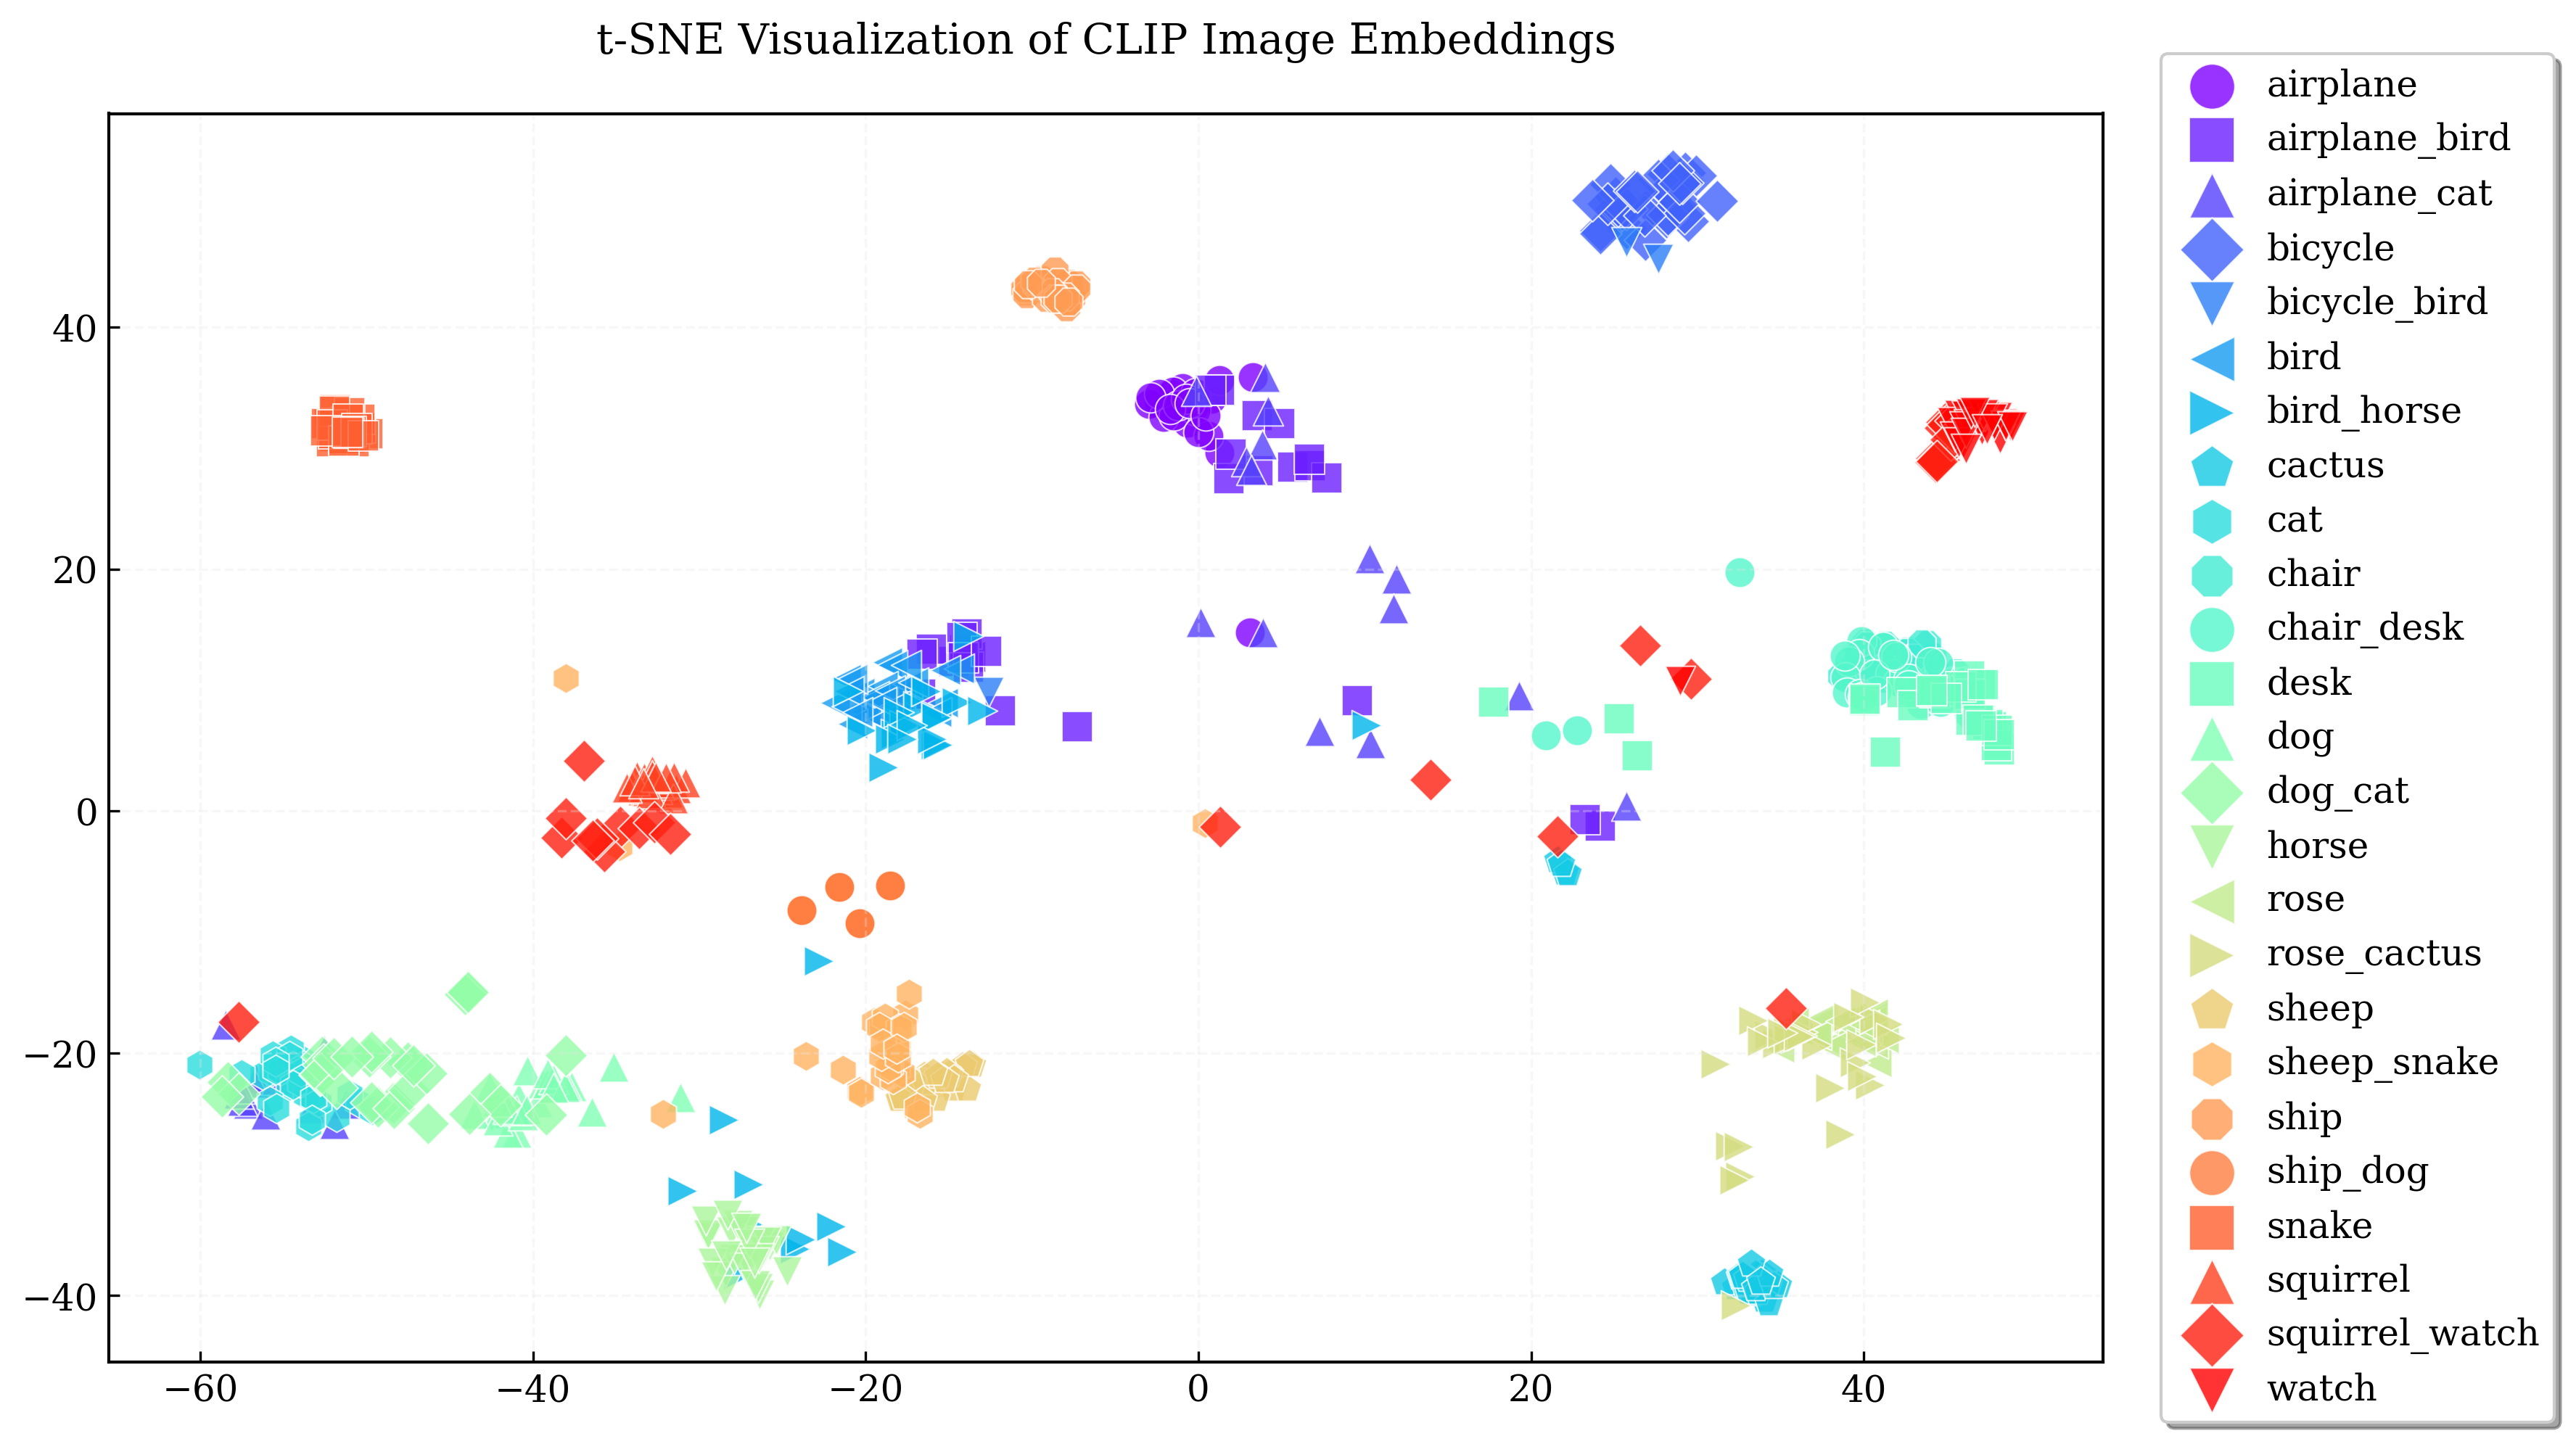

In [8]:
# 创建样式字典
style_dict = {
    'font.family': 'DejaVu Serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.linewidth': 1.0,
    'grid.color': '#E5E5E5'
}

# 使用字典设置样式
plt.style.use(style_dict)

# 可视化部分的更新
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# 添加要显示的混合类列表
mix_categories_to_show = ['airplane_bird','bird_horse','dog_cat','chair_desk',
                            'rose_cactus','bicycle_bird','sheep_snake','squirrel_watch','airplane_cat','ship_dog']

# 获取混合类中出现的原始类别
original_categories_to_show = set()
for mix_category in mix_categories_to_show:
    parts = mix_category.split('_')
    original_categories_to_show.update(parts)

# 获取唯一的类别列表
unique_categories = []
for category in set(categories):
    # 如果是原始类别且在混合类的组成部分中，则添加
    if '_' not in category and category in original_categories_to_show:
        unique_categories.append(category)
    # 如果是混合类且在指定显示列表中，则添加
    elif category in mix_categories_to_show:
        unique_categories.append(category)

# 按字母顺序排序类别
unique_categories.sort()


n_unique_categories = len(unique_categories)

# 为每个唯一类别分配颜色和标记
distinct_colors = plt.cm.rainbow(np.linspace(0, 1, n_unique_categories))
base_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'h', '8']
markers = (base_markers * (n_unique_categories // len(base_markers) + 1))[:n_unique_categories]

# 创建类别到颜色和标记的映射
category_to_color = dict(zip(unique_categories, distinct_colors))
category_to_marker = dict(zip(unique_categories, markers))

# 绘制散点图
for category in unique_categories:
    # 获取该类别的所有点的索引
    mask = [c == category for c in categories]
    points = image_points[mask]
    
    ax.scatter(points[:, 0], points[:, 1],
                    c=[category_to_color[category]],
                    marker=category_to_marker[category],
                    label=category,
                    s=100,
                    alpha=0.8,
                    edgecolors='white',
                    linewidth=0.5)

# 优化图例位置和样式
ax.legend(frameon=True, 
                fancybox=True, 
                shadow=True, 
                loc='center left', 
                bbox_to_anchor=(1.02, 0.5),  # 略微向右移动
                ncol=1,  # 4列显示
                markerscale=1.5,
                columnspacing=1.0,  # 添加列间距
                handletextpad=0.5)  # 减小标记和文本之间的间距

# 设置标题
plt.title('t-SNE Visualization of CLIP Image Embeddings', 
                pad=20, fontsize=14)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()